In [1]:
# Import Data Manipulation libraries
import pandas as pd
import numpy as np 
import statistics 
import os

#Import Data Visualization libraries 
import matplotlib.pyplot as plt 
import matplotlib as mpl

Merge all 12 files into one csv file 

In [2]:
#Confirm file is accessible 
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
df.head()

#List comprehension to load all files into a list

files = [file for file in os.listdir('./Sales_Data')]

files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
#Create an empty dataframe to hold all 12 months of data 
total_files = pd.DataFrame()

#For loop to read through monthly files and merge/concat together into one csv file 
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    total_files = pd.concat([total_files, df])
total_files

total_files.to_csv("./Sales_Data/all_months.csv", index=False)



In [4]:
#Read in the new combined data 

final_df = pd.read_csv("./Sales_Data/all_months.csv")

final_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Convert columns into appropriate data types for analysis

In [5]:
final_df[['Quantity Ordered', 'Price Each']] = final_df[['Quantity Ordered', 'Price Each']].apply(pd.to_numeric, errors='coerce')
final_df['Order Date'] = pd.to_datetime(final_df['Order Date'], errors='coerce')
final_df.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [6]:
final_df = final_df.dropna(how='any')
                           
cleaned_df = final_df .reset_index(drop=True)

cleaned_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


#### Pull month out of Order Date

In [7]:
cleaned_df['Month'] = pd.DatetimeIndex(cleaned_df['Order Date']).month
cleaned_df['Month'] = cleaned_df['Month'].astype(int)
cleaned_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


#### Add Total Column: Quantity * Price Each


In [8]:
cleaned_df['Total Spent'] = cleaned_df['Quantity Ordered'] * cleaned_df['Price Each']
cleaned_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Spent
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


### What was the best month for sales? How much was earned in that month? 

In [18]:
total_sales =  cleaned_df.groupby('Month').sum()
total_sales

,Quantity Ordered,Price Each,Total Spent
Month,,,
1,10903.0,1.811768e+06,1.822257e+06
2,13449.0,2.188885e+06,2.202022e+06
3,17005.0,2.791208e+06,2.807100e+06
4,20558.0,3.367671e+06,3.390670e+06
5,18667.0,3.135125e+06,3.152607e+06
6,15253.0,2.562026e+06,2.577802e+06
7,16072.0,2.632540e+06,2.647776e+06
8,13448.0,2.230345e+06,2.244468e+06
9,13109.0,2.084992e+06,2.097560e+06


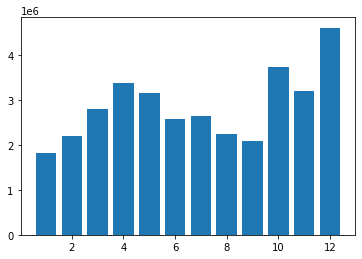

In [19]:
# Range is exclusive so 13 to include 12 
months = range(1,13)

plt.bar(months, total_sales['Total Spent'])

plt.xticks(months)
plt.xlabel('Sales in USD ($), Million')
plt.ylable()
plt.show()